__H 4.1__ K-means clustering: In this exercise we will perform color-based segmentation using K-means algorithm.  
(a) Implement K-means algorithm in Python that accepts target number of clusters (K) and a color image as input parameters. Treat each color pixel as 3-dim. feature vector $x_i$. A general K-means algorithm can be described as follows. Suppose we are given training examples $x_1, x_2, . . . , x_N ,$ where each $x_n ∈ R^d$. We want to group the N data samples into K clusters.  
i. Initialize cluster centers $µ_1, . . . , µ_K ∈ R^d$ at random.  
ii. Repeat until convergence {  
For every data point $x_i$, update its label as

$$
    l_i = \text{arg}\min_j ||\mathbf{x}_i - \mu_j||^2_2 \tag{1}
$$

For each cluster $j$, update its center $\mu_j$ as mean of all points assigned to cluster $j$:

$$
    \mu_j = \frac{\sum^N_{i=1} \delta\{l_i = j\}\mathbf{x}_i}{\sum^N_{i=1} \delta\{l_i = j\}\mathbf{x}_i} \tag{2}
$$
}

In [12]:
import numpy as np
import imageio

def KMeans(clusters, image):
    # K-means clustering with a color image.
    I = imageio.imread(image)
    [N,M] = I.shape[:2]    # Number of row and columns in image.
    num_pixels = N*M    # Number of pixels
    D = I.shape[2]
    I = I.reshape(num_pixels,D)
   
    
    centers = np.random.uniform(0, 255, (clusters, D))
    
    labels = []
    old_centers = None
    step = 0
    while(np.all(old_centers == None) or np.abs(np.all(np.sum(centers-old_centers, 1)) > 0.001)):
        labels.clear()
        for n in range(num_pixels):
            x = I[n,:]
            norm = np.sum(np.square(x - centers), 1)
            labels.append(np.argmin(norm))    # Label = index of min.

        labels_arr = np.array(labels).reshape(num_pixels,)
        old_centers = np.copy(centers)
       
        for k in range(clusters):    # Updating centers using mean of points belonging to the label.
            delta_k = (labels_arr==k).astype(int).reshape(num_pixels,1)
            if(np.sum(delta_k) == 0):
                centers[k,:] = np.array([0, 0, 0])
            else:
                centers[k,:] = np.sum(np.multiply(delta_k,I),0)/np.sum(delta_k)
        print("Step {}".format(step))
        step += 1
        
    # After convergence the pixels need to be assigned the correct labels.
    for n in range(num_pixels):
            I[n,:] = centers[labels_arr[n]] 
    # The image was "flattened" for processing, so it is put back into its original shape.
    I = I.reshape(N,M,D)
    return I

(b) Take a selfie of yourself with a background that has different colors from your skin and clothing. Use K-means script from previous step to segment your image into K clusters. To create a segmented output image, replace every pixel in your image with the center of the cluster assigned to it. Report your results for $K= \{2, 4, 8, 16\}$ clusters.

In [14]:
I2 = KMeans(2, 'a.jpg')
print("Two segments done.")
I4 = KMeans(4, 'a.jpg')
print("Four segments done.")
I8 = KMeans(8, 'a.jpg')
print("Eight segments done.")
I16 = KMeans(16, 'a.jpg')
print("Sixteen segments done.")

Step 0
Step 1
Step 2
Step 3
Step 4
Step 5
Two segments done.
Step 0
Step 1
Step 2
Step 3
Step 4
Step 5
Step 6
Step 7
Step 8
Four segments done.
Step 0
Step 1
Eight segments done.
Step 0
Step 1
Sixteen segments done.


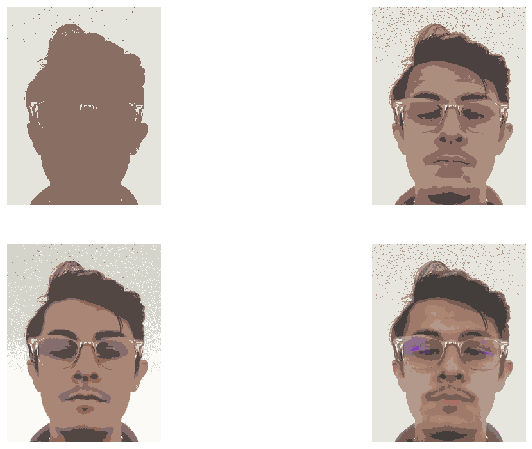

In [51]:
import matplotlib.pyplot as plt

# Source: Standford cs231n course.
def imshow_noax(img, normalize=True):
    """ Tiny helper to show images as uint8 and remove axis labels """
    if normalize:
        img_max, img_min = np.max(img), np.min(img)
        img = 255.0 * (img - img_min) / (img_max - img_min)
    plt.imshow(img.astype('uint8'))
    plt.gca().axis('off')

plt.figure(figsize=(12,8))
plt.subplot(221)
imshow_noax(I2, False)
plt.subplot(222)
imshow_noax(I4, False)
plt.subplot(223)
imshow_noax(I8, False)
plt.subplot(224)
imshow_noax(I16, False)

plt.show()

(c) Repeat steps (a) and (b) with absolute distance instead of squared euclidean distance. That is, implement a new script that replaces minimum euclidean distance in (1) with minimum absolute $\text{distance}^1$ $l_i = \text{arg} \min_j ||\mathbf{x}_i − µ_j||_1$. Report your results for selfie segmentation using the new distance.

In [20]:
def KMeans_absdistance(clusters, image):
# K-means clustering with a color image.
    I = imageio.imread(image)
    [N,M] = I.shape[:2]    # Number of row and columns in image.
    num_pixels = N*M    # Number of pixels
    D = I.shape[2]
    I = I.reshape(num_pixels,D)
   
    
    centers = np.random.uniform(0, 255, (clusters, D))
    
    labels = []
    old_centers = None
    step = 0
    while(np.all(old_centers == None) or np.abs(np.all(np.sum(centers-old_centers, 1)) > 0.001)):
        labels.clear()
        for n in range(num_pixels):
            x = I[n,:]
            dist = np.sum(np.abs(x - centers), 1)
            labels.append(np.argmin(dist))

        labels_arr = np.array(labels).reshape(num_pixels,)
    #         print((labels==6).astype(int).reshape(num_pixels,1)[:10])
    #         print(np.multiply((labels==6).astype(int).reshape(num_pixels,1), I)[:10])
        old_centers = np.copy(centers)
       
        for k in range(clusters):
            delta_k = (labels_arr==k).astype(int).reshape(num_pixels,1)
            if(np.sum(delta_k) == 0):
                centers[k,:] = np.array([0, 0, 0])
            else:
                centers[k,:] = np.sum(np.multiply(delta_k,I),0)/np.sum(delta_k)
        print("Step {}".format(step))
        step += 1

    for n in range(num_pixels):
            I[n,:] = centers[labels_arr[n]]
    I = I.reshape(N,M,D)
    return I

In [21]:
I2 = KMeans_absdistance(2, 'a.jpg')
print("Two segments done.")
I4 = KMeans_absdistance(4, 'a.jpg')
print("Four segments done.")
I8 = KMeans_absdistance(8, 'a.jpg')
print("Eight segments done.")
I16 = KMeans_absdistance(16, 'a.jpg')
print("Sixteen segments done.")

Step 0
Step 1
Step 2
Step 3
Step 4
Step 5
Step 6
Two segments done.
Step 0
Step 1
Step 2
Step 3
Step 4
Step 5
Step 6
Step 7
Step 8
Step 9
Step 10
Four segments done.
Step 0
Step 1
Eight segments done.
Step 0
Step 1
Sixteen segments done.


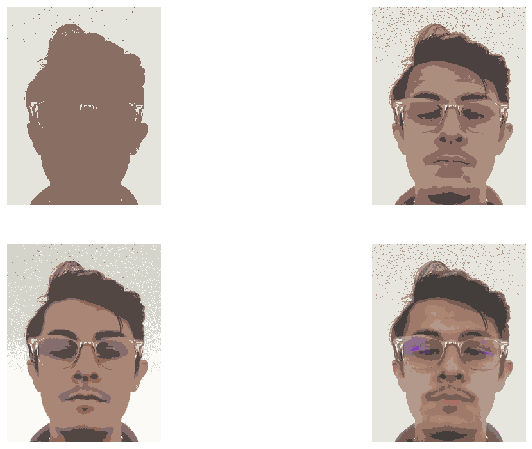

In [22]:
plt.figure(figsize=(12,8))
plt.subplot(221)
imshow_noax(I2, False)
plt.subplot(222)
imshow_noax(I4, False)
plt.subplot(223)
imshow_noax(I8, False)
plt.subplot(224)
imshow_noax(I16, False)

plt.show()

__H4.2__ Principal component analysis (PCA): In this problem we will consider two tasks. First, we will explore the efficiency of PCA as a tool for dimensionality reduction and compression. Then, we will utilize PCA for constructing a rudimentary face recognition algorithm. ATT Face dataset contains images of the faces of 40 individuals. For each individual, there are 10 images taken under different poses. Divide your data into two sets: select 60% of images for training and remaining 40% for testing.  


In [96]:
data_set = []
labels = []
for face in range(40):
    for pic in range(10):
        picture = imageio.imread('att_faces/s{}/{}.pgm'.format(face+1, pic+1))
        [M,N] = picture.shape
        pic_size = picture.size
        data_set.append(picture.reshape(pic_size))    # Flattening image
        labels.append(face+1)

labels = np.array(labels)
data_set = np.array(data_set)

data_idx = np.random.choice(400, 400, replace=False)
train_idx = data_idx[:240]
test_idx = data_idx[241:]
training_data = np.copy(data_set[train_idx])
training_labels = np.array(labels[train_idx])
test_data = np.copy(data_set[test_idx])
test_labels = np.array(labels[test_idx])

(a) Perform PCA on the training images viewed as points in high-dimensional space (using their pixel values). Plot a curve displaying the amount of “energy” captured by the first k principal
components, where energy is the cumulative sum of top-k components variances, divided by the sum of all the variances. How many components do we need in order to capture 50% of the energy? How much of the energy is captured with k = 25?

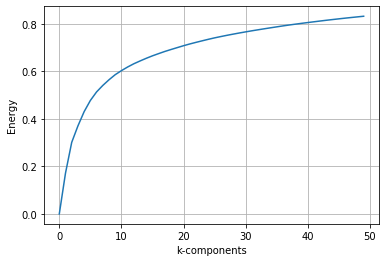

Energy captured in top 25 components: 0.7406347744942318


In [97]:
from sklearn.decomposition import PCA

n_components = 50
faces_pca = PCA(n_components)
faces_pca.fit(training_data)



energy = np.zeros(n_components)
for idx in range(n_components):
    energy[idx] = np.sum(faces_pca.explained_variance_ratio_[:idx])
    
plt.subplot(111, xlabel='k-components', ylabel='Energy')
plt.plot(np.arange(n_components), energy)
plt.grid()
plt.show()

print("Energy captured in top 25 components: {}".format(energy[25]))

To capture 50% of the energy the top 5 components are required.

(b) Visualize the previously discovered top 25 eigenfaces (eigenvectors obtained from PCA). Order them according to the magnitudes of their corresponding eigenvalues and plot them in a single figure. 

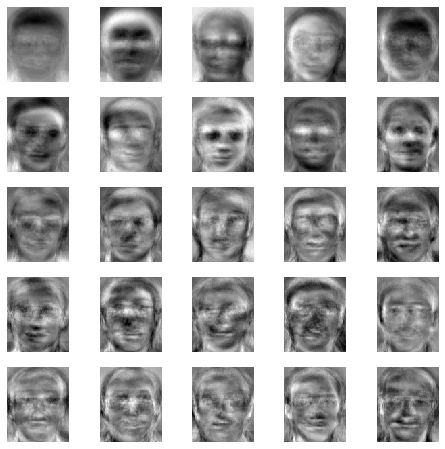

In [98]:
eigenfaces = faces_pca.components_[:25]    # Should already be sorted by magnitude of eigenvalues
eigenfaces_image = eigenfaces.reshape(25, M,N)

plt.figure(figsize=(8,8))
for idx in range(1,26):
    plt.subplot(5,5,idx)
    plt.imshow(eigenfaces_image[idx-1,:,:], cmap = 'gray')
    plt.axis('off')
plt.show()

(c) Let us now try to recognize the identity of a person’s face in a previously unseen image. Load an image from the test set, subtract from it the mean of the training images and project it to the previously computed top-25 principal components. Then, use a nearest neighbor search to find its closest image in the training set. If the nearest neighbor found depicts the face of the same person as the one of the unseen image, consider this as a successful discovery of the person’s identity. Repeat this experiment for all the test images and report the mean accuracy on the entire test data set. Make comments on the test images that are mistakenly identified.


In [102]:
training_mean = np.average(training_data, 0)
num_right = 0
wrong_images = []
for idx in range(test_data.shape[0]):
    I = test_data[idx]
    var = training_mean - I
    projection = np.matmul(eigenfaces, I)
    tmp = np.abs(projection.reshape(25,1) - np.matmul(eigenfaces, training_data.T))
    NN = np.argmin(np.sum(tmp,0))
    if (training_labels[NN] == test_labels[idx]):
        num_right += 1
    else:
        wrong_images.append([training_data[NN], test_data[idx]])

acc = num_right/test_data.shape[0]
print("Accuracy: {}".format(acc))

Accuracy: 0.9182389937106918


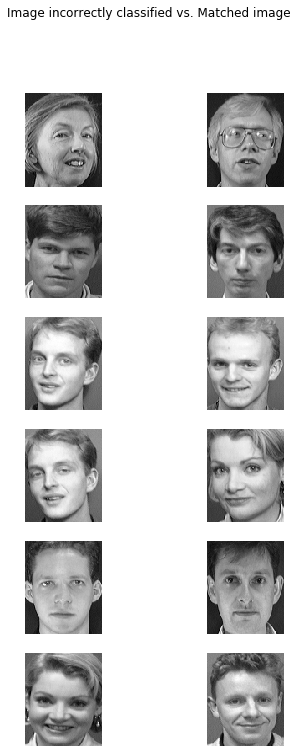

In [119]:
k = 6
# going to show k wrong images and face it attempted to match to.
plt.figure(figsize=(6,12)).suptitle("Image incorrectly classified vs. Matched image")
plt_idx = 1
for idx in range(k):
    plt.subplot(k,2,plt_idx)
    plt.imshow(wrong_images[idx][1].reshape(M,N), cmap='gray')
    plt.axis('off')
    plt_idx += 1
    plt.subplot(k,2,plt_idx)
    plt.imshow(wrong_images[idx][0].reshape(M,N), cmap='gray')
    plt.axis('off')
    plt_idx += 1

plt.show()

The output from the cell above shows on the left the images that were incorrectly classified from the test data. On the right are images that the test data matched to, corresponding to neighest neighbor matching in the face space. The corresponding images, have similar background colors and overall color balanace. Additionally, the subjects heads are generally facing in the same direction. In the set above ~66% of the time this is true.